In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading the csv file:
df = pd.read_csv(r"C:\Users\gopik\OneDrive\Desktop\FINAL PROJECT\political_stability\political_stability.csv")

In [3]:
#Initial data inspection:
df.info()
df.shape
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               5025 non-null   object 
 1   STRUCTURE_ID            5025 non-null   object 
 2   ACTION                  5025 non-null   object 
 3   FREQ                    5025 non-null   object 
 4   REF_AREA                5025 non-null   object 
 5   INDICATOR               5025 non-null   object 
 6   SEX                     5025 non-null   object 
 7   AGE                     5025 non-null   object 
 8   URBANISATION            5025 non-null   object 
 9   UNIT_MEASURE            5025 non-null   object 
 10  COMP_BREAKDOWN_1        5025 non-null   object 
 11  COMP_BREAKDOWN_2        5025 non-null   object 
 12  COMP_BREAKDOWN_3        5025 non-null   object 
 13  TIME_PERIOD             5025 non-null   int64  
 14  AGG_METHOD              5025 non-null   

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,REF_AREA,INDICATOR,SEX,AGE,URBANISATION,UNIT_MEASURE,...,COMP_BREAKDOWN_2_LABEL,COMP_BREAKDOWN_3_LABEL,AGG_METHOD_LABEL,UNIT_TYPE_LABEL,DECIMALS_LABEL,DATABASE_ID_LABEL,TIME_FORMAT_LABEL,UNIT_MULT_LABEL,OBS_STATUS_LABEL,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,VUT,WB_WDI_PV_EST,_T,_T,_T,IX,...,Not Applicable,Not Applicable,Not Applicable,Index,Two,World Development Indicators (WDI),Annual,Units,Normal value,Public
1,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,VEN,WB_WDI_PV_EST,_T,_T,_T,IX,...,Not Applicable,Not Applicable,Not Applicable,Index,Two,World Development Indicators (WDI),Annual,Units,Normal value,Public


In [4]:
#Checking for columns
df.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'REF_AREA', 'INDICATOR',
       'SEX', 'AGE', 'URBANISATION', 'UNIT_MEASURE', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_3', 'TIME_PERIOD', 'AGG_METHOD',
       'UNIT_TYPE', 'DECIMALS', 'DATABASE_ID', 'TIME_FORMAT', 'COMMENT_TS',
       'UNIT_MULT', 'DATA_SOURCE', 'OBS_CONF', 'OBS_VALUE', 'OBS_STATUS',
       'FREQ_LABEL', 'REF_AREA_LABEL', 'INDICATOR_LABEL', 'SEX_LABEL',
       'AGE_LABEL', 'URBANISATION_LABEL', 'UNIT_MEASURE_LABEL',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3_LABEL', 'AGG_METHOD_LABEL', 'UNIT_TYPE_LABEL',
       'DECIMALS_LABEL', 'DATABASE_ID_LABEL', 'TIME_FORMAT_LABEL',
       'UNIT_MULT_LABEL', 'OBS_STATUS_LABEL', 'OBS_CONF_LABEL'],
      dtype='object')

In [5]:
#Selecting only useful columns for analysis:
cols_to_keep = [
    "REF_AREA",
    "REF_AREA_LABEL",
    "TIME_PERIOD",
    "OBS_VALUE",
    "INDICATOR_LABEL",
    "UNIT_MEASURE_LABEL"
]

In [6]:
politics = df[cols_to_keep].copy()

In [7]:
#Renaming the columns
politics.rename(columns={
    "REF_AREA": "country_code",
    "REF_AREA_LABEL": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "political_stability_score",
    "INDICATOR_LABEL": "indicator",
    "UNIT_MEASURE_LABEL": "unit"
}, inplace=True)

In [8]:
#Checking data types:
politics.dtypes
#The dataset already has appropriate data types for analysis, so no further dtype conversions were required. 

country_code                  object
country                       object
year                           int64
political_stability_score    float64
indicator                     object
unit                          object
dtype: object

In [9]:
#Checking for missing value:
politics.isna().sum()

country_code                 0
country                      0
year                         0
political_stability_score    0
indicator                    0
unit                         0
dtype: int64

In [10]:
#Checking for duplicates:
politics.duplicated().any()

np.False_

In [11]:
#cleaning category value
politics["country"] = politics["country"].str.strip().str.title()

In [12]:
#Final dataset check
politics.shape
politics.info()
politics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_code               5025 non-null   object 
 1   country                    5025 non-null   object 
 2   year                       5025 non-null   int64  
 3   political_stability_score  5025 non-null   float64
 4   indicator                  5025 non-null   object 
 5   unit                       5025 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 235.7+ KB


,country_code,country,year,political_stability_score,indicator,unit
0,VUT,Vanuatu,2011,1.109437,Political Stability and Absence of Violence/Te...,Index
1,VEN,"Venezuela, Rb",2011,-1.094046,Political Stability and Absence of Violence/Te...,Index
2,VNM,Vietnam,2011,0.189088,Political Stability and Absence of Violence/Te...,Index
3,VIR,Virgin Islands (U.S.),2011,0.860623,Political Stability and Absence of Violence/Te...,Index
4,PSE,West Bank And Gaza,2011,-1.935620,Political Stability and Absence of Violence/Te...,Index


In [13]:
# EXPLORATORY DATA ANALYSIS(EDA):

In [14]:
#Has global political stability improved or declined over time?

In [15]:
global_trend = politics.groupby("year")['political_stability_score'].mean().reset_index()

In [16]:
global_trend.head()

,year,political_stability_score
0,1996,-0.007312
1,1998,-0.006874
2,2000,-0.005648
3,2002,-0.008280
4,2003,-0.009151


In [17]:
import matplotlib.pyplot as plt


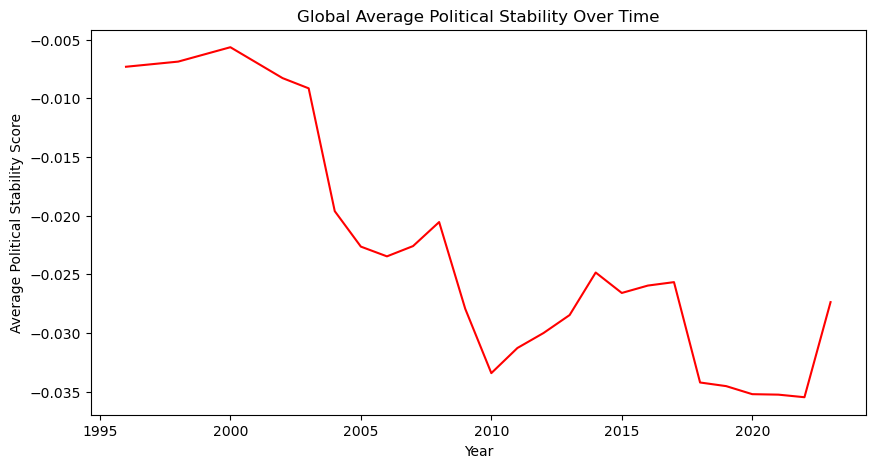

In [18]:
plt.figure(figsize=(10,5))
plt.plot(global_trend["year"], global_trend["political_stability_score"], color ='red')
plt.title("Global Average Political Stability Over Time")
plt.xlabel("Year")
plt.ylabel("Average Political Stability Score")
plt.show()

In [19]:
#Global political stability shows a clear long-term decline from the late 1990s to recent years. 
#After a relatively stable period around 1996–2000, the average score drops sharply in the mid-2000s 
#and remains persistently negative, indicating increasing global instability with only brief, temporary recoveries.

In [20]:
#Which countries are the most and least politically stable on average?


In [21]:
country_avg = politics.groupby("country")["political_stability_score"].mean().sort_values(ascending=False).reset_index()
top_10 = country_avg.head(10)
bottom_10 = country_avg.tail(10)

top_10, bottom_10

(         country  political_stability_score
 0      Greenland                   1.827424
 1  Liechtenstein                   1.438108
 2        Andorra                   1.370914
 3     Luxembourg                   1.364661
 4    New Zealand                   1.358230
 5        Iceland                   1.356659
 6    Switzerland                   1.300535
 7         Tuvalu                   1.297287
 8        Finland                   1.295881
 9          Aruba                   1.285098,
                          country  political_stability_score
 195                      Nigeria                  -1.806594
 196     Central African Republic                  -1.852725
 197                     Pakistan                  -2.073885
 198                  Yemen, Rep.                  -2.137489
 199             Congo, Dem. Rep.                  -2.147862
 200                  South Sudan                  -2.155847
 201                        Sudan                  -2.165325
 202            

In [22]:
#The distribution of average political stability scores reveals strong structural differences across countries. 
#A small group of countries consistently exhibits high stability, while a larger group remains persistently unstable. 
#This indicates that political stability is driven by long-term institutional factors rather than short-term fluctuations.

In [23]:
#Which countries have improved or deteriorated the most over time?

In [24]:
politics = politics.sort_values(["country", "year"]).reset_index(drop=True)

politics["yoy_change"] = politics.groupby("country", group_keys=False)["political_stability_score"].transform(lambda x: x.diff())


In [25]:
yoy_summary = politics.groupby('country')['yoy_change'].mean().sort_values(ascending =False).reset_index()
yoy_summary.head(10),yoy_summary.tail(10)

(         country  yoy_change
 0        Liberia    0.096802
 1         Rwanda    0.081393
 2         Angola    0.071684
 3     Tajikistan    0.068497
 4   Sierra Leone    0.060767
 5      Sri Lanka    0.052907
 6    Congo, Rep.    0.051838
 7        Georgia    0.051459
 8  Guinea-Bissau    0.050515
 9        Algeria    0.050226,
                   country  yoy_change
 195           Yemen, Rep.   -0.052142
 196               Ukraine   -0.053236
 197    Iran, Islamic Rep.   -0.057062
 198                 Benin   -0.058205
 199           South Sudan   -0.062982
 200                 Niger   -0.070625
 201          Burkina Faso   -0.072270
 202                Kosovo   -0.088973
 203  Syrian Arab Republic   -0.100110
 204                  Mali   -0.128929)

In [28]:
#Which countries are the most politically volatile?

In [29]:
volatility = politics.groupby("country")["political_stability_score"].std().sort_values(ascending=False).reset_index()
volatility.head(10)

,country,political_stability_score
0,Libya,1.258804
1,Syrian Arab Republic,1.258343
2,Mali,1.186102
3,Ukraine,0.780441
4,Liberia,0.713946
5,Rwanda,0.686573
6,Nepal,0.682322
7,Burkina Faso,0.672288
8,Mozambique,0.649448
9,Thailand,0.625805


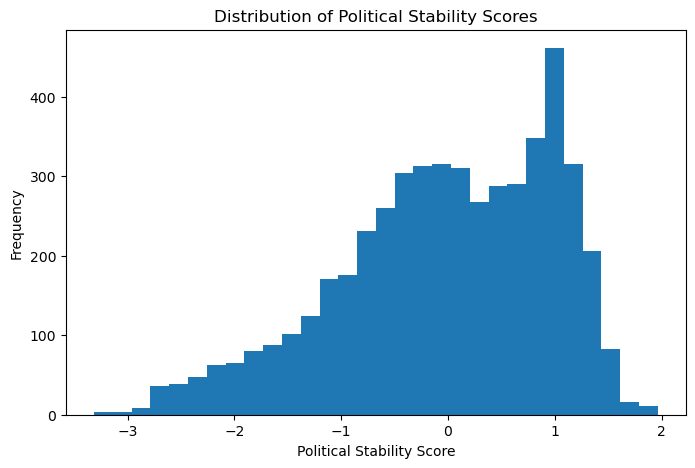

In [30]:
#How are political stability scores distributed globally?
plt.figure(figsize=(8,5))
plt.hist(politics["political_stability_score"], bins=30)
plt.title("Distribution of Political Stability Scores")
plt.xlabel("Political Stability Score")
plt.ylabel("Frequency")
plt.show()

In [31]:
##The global distribution of political stability scores is skewed toward negative values, with most countries clustered around moderate 
#to low stability and a long tail of highly unstable states.
#Only a small number of countries exhibit consistently high political stability, highlighting significant structural disparities across nations.

In [32]:
#How many countries fall into stability categories?


In [33]:
def stability_category(score):
    if score >= 1:
        return "High Stability"
    elif score >= 0:
        return "Moderate Stability"
    elif score >= -1:
        return "Low Stability"
    else:
        return "Very Low Stability"

politics["stability_category"] = politics["political_stability_score"].apply(stability_category)



In [34]:
category_counts = politics.groupby("stability_category")["country"].nunique().reset_index(name="country_count")
category_counts

,stability_category,country_count
0,High Stability,76
1,Low Stability,121
2,Moderate Stability,145
3,Very Low Stability,72


In [35]:
#Most countries fall into the Moderate and Low Stability categories, indicating that political stability is 
#generally fragile rather than strong globally. A relatively smaller number of countries achieve High Stability, 
#while a significant share remains in the Very Low Stability category, highlighting persistent global governance challenges.

In [36]:
politics.columns

Index(['country_code', 'country', 'year', 'political_stability_score',
       'indicator', 'unit', 'yoy_change', 'stability_category'],
      dtype='object')

In [37]:
#Exporting the cleaned csv file to build powerbi dashboard:
politics.to_csv("political_stability_cleaned.csv", index=False)
